In [1]:
import cv2
import os
from module.img_enhance.half_UGV import *
from module.img_enhance.reflection_removal import * 

In [2]:
r_max = 120

image = "Iris-Dataset/CASIA-Iris-Thousand/046/R/S5046R09.jpg"
# Load the reference image
image1 = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Get the reflection mask
mask = adaptive_thresholding(image1)
mask = region_size_filtering(mask)
mask = morphological_dilation(mask)

# Remove reflections
img_no_reflections = remove_reflections(image1, mask)
preprocess_image = preprocessing(img_no_reflections)
# preprocess_image = img_no_reflections
targeting_image = find_target_pixel(preprocess_image, r_max)

# Process Daughman
pupil, iris, circle = Daughman_Algorithm(preprocess_image, targeting_image, r_max)

TypeError: only integer scalar arrays can be converted to a scalar index

In [3]:
import matplotlib.pyplot as plt

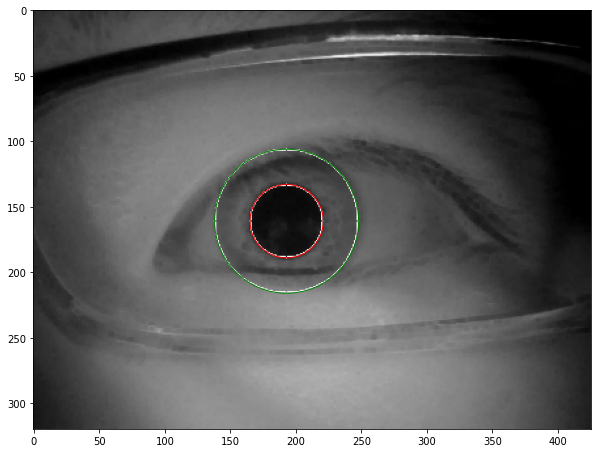

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(preprocess_image, cmap='gray')
pupil_circle = plt.Circle((pupil[0], pupil[1]), pupil[2], color='r', fill=False)
iris_circle = plt.Circle((iris[0], iris[1]), iris[2], color='g', fill=False)

# plt.scatter(circle[0], circle[1], s=1, c='b')
plt.gcf().gca().add_artist(pupil_circle)
plt.gcf().gca().add_artist(iris_circle)
plt.show()

In [5]:
from module.Iris_recognition import *

In [6]:
img = read_image(image)
_, snake, circles = localization(img, N=400, pupil_loc=(pupil[0]//2*3, pupil[1]//2*3, pupil[2]//2*3))

pupil_circle = circles
iris_circle = np.flip(np.array(snake).astype(int), 1)

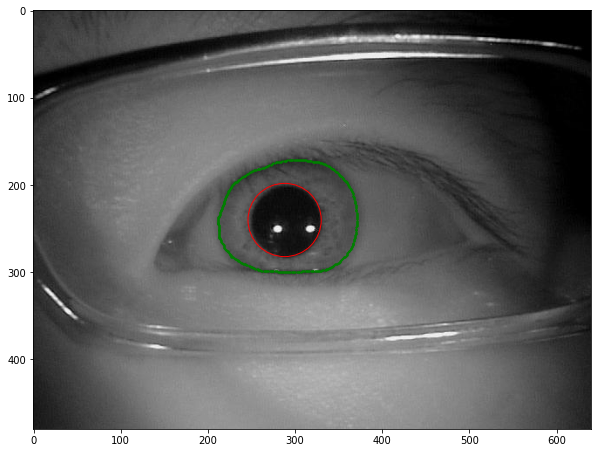

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
pupil_circle = plt.Circle((pupil_circle[0], pupil_circle[1]), pupil_circle[2], color='r', fill=False)
iris_circle = plt.scatter(iris_circle[:, 0], iris_circle[:, 1], s=1, c='g')

# plt.scatter(circle[0], circle[1], s=1, c='b')
plt.gcf().gca().add_artist(pupil_circle)
plt.gcf().gca().add_artist(iris_circle)
plt.show()